In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(clinical_df, mouse_df, how='outer', on='Mouse ID')

# Display the data table for preview
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = merge_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']
# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean)
# Preview DataFrame
tumor_mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_stderror = merge_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']
# Convert to DataFrame
tumor_stderror_df = pd.DataFrame(tumor_stderror)
# Preview DataFrame
tumor_stderror_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [12]:
# Minor Data Munging to Re-Format the Data Frames
mean_re_format = tumor_mean_df.reset_index()
mean_pivot_df = mean_re_format.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
# Preview that Reformatting worked
mean_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


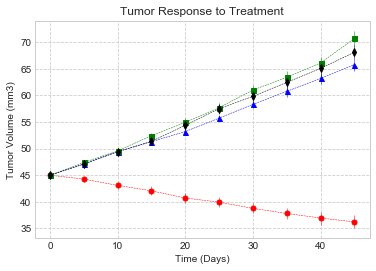

In [37]:
# Generate error pivot
error_re_format = tumor_stderror_df.reset_index()
error_pivot_df = error_re_format.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 10)
x_limit = 45
plt.figure(figsize=(6,4))

plt.errorbar(mean_pivot_df.index, mean_pivot_df["Capomulin"], yerr=error_pivot_df["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Infubinol"], yerr=error_pivot_df["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Ketapril"],yerr=error_pivot_df["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_pivot_df.index, mean_pivot_df["Placebo"],yerr=error_pivot_df["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=16, fancybox=True)
# Save the Figure
plt.savefig("TumorResponsetoTreatment.png")


In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [38]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean = merge_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']
# Convert to DataFrame
meta_mean_df = pd.DataFrame(meta_mean)
# Preview DataFrame
meta_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [39]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_error = merge_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
meta_error_df = pd.DataFrame(meta_error)

# Preview DataFrame
meta_error_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [42]:
# Minor Data Munging to Re-Format the Data Frames
meta_mean_re_format = meta_mean_df.reset_index()

meta_mean_pivot = meta_mean_re_format.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

meta_error_re_format = meta_error_df.reset_index()
meta_error_pivot = meta_error_re_format.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
meta_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [43]:
meta_error_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


No handles with labels found to put in legend.


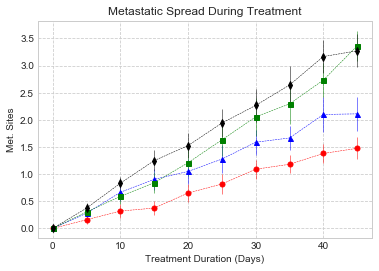

In [49]:
# Generate the Plot (with Error Bars)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Capomulin"], yerr=meta_error_pivot["Capomulin"],\
             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Infubinol"], yerr=meta_error_pivot["Infubinol"],\
             color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Ketapril"],yerr=meta_error_pivot["Ketapril"],\
             color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot["Placebo"],yerr=meta_error_pivot["Placebo"],\
             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12)


# Save the Figure
plt.savefig("MetastaticResponsetoTreatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [51]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = merge_df.groupby(["Drug", "Timepoint"]).count()['Mouse ID']

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mouse Count": mice_count})

# Preview DataFrame
mice_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [52]:
# Minor Data Munging to Re-Format the Data Frames
mice_reformat = mice_count_df.reset_index()
mice_pivot = mice_reformat.pivot(index='Timepoint', columns='Drug')['Mouse Count']

# Preview the Data Frame
mice_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


No handles with labels found to put in legend.


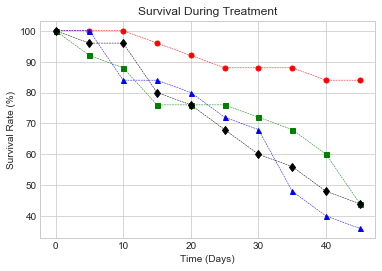

In [53]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * mice_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)


plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [55]:
# Calculate the percent changes for each drug
drug_pct_change =  100 * (mean_pivot_df.iloc[-1] - mean_pivot_df.iloc[0]) / mean_pivot_df.iloc[0]
drug_pct_change_sem =  100 * (error_pivot_df.iloc[-1] - error_pivot_df.iloc[0]) / error_pivot_df.iloc[0]

# Display the data to confirm
drug_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

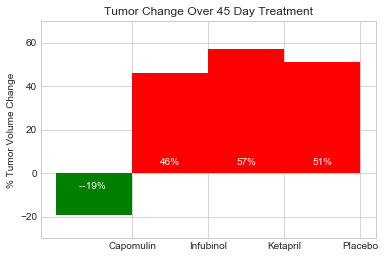

In [56]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (drug_pct_change["Capomulin"], 
               drug_pct_change["Infubinol"], 
               drug_pct_change["Ketapril"], 
               drug_pct_change["Placebo"])


# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("Tumor_Change.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)